In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
adult_df = df.loc[~(df=='?').any(axis=1)]
adult_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [10]:
adult_df['workclass'].value_counts()
adult_df['education'].value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64

In [19]:
def calculate_demographic_data(print_data=True):
    # Read the dataset
    df = pd.read_csv('adult.csv')

    # 1. How many people of each race are represented in this dataset?
    race_count = df['race'].value_counts()

    # 2. What is the average age of men?
    average_age_men = df[df['sex'] == 'Male']['age'].mean()

    # 3. What is the percentage of people who have a Bachelor's degree?
    percentage_bachelors = (df['education'] == 'Bachelors').sum() / len(df) * 100

    # 4. What percentage of people with advanced education make more than 50K?
    higher_education = df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])
    percentage_higher_education = (df[higher_education]['income'] == '>50K').sum() / len(df[higher_education]) * 100

    # 5. What percentage of people without advanced education make more than 50K?
    lower_education = ~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])
    percentage_lower_education = (df[lower_education]['income'] == '>50K').sum() / len(df[lower_education]) * 100

    # 6. What is the minimum number of hours a person works per week?
    min_work_hours = df['hours.per.week'].min()

    # 7. What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
    num_min_workers = df[df['hours.per.week'] == min_work_hours]
    rich_percentage = (num_min_workers['income'] == '>50K').sum() / len(num_min_workers) * 100

    # 8. What country has the highest percentage of people that earn >50K and what is that percentage?
    highest_earning_country = (df[df['income'] == '>50K']['native.country'].value_counts() / df['native.country'].value_counts()).idxmax()
    highest_earning_country_percentage = (df[df['income'] == '>50K']['native.country'].value_counts() / df['native.country'].value_counts()).max() * 100

    # 9. Identify the most popular occupation for those who earn >50K in India.
    top_IN_occupation = df[(df['native.country'] == 'India') & (df['income'] == '>50K')]['occupation'].mode()[0]

    if print_data:
        print("1. People of each race:")
        print(race_count)
        print("\n2. Average age of men:", round(average_age_men, 1))
        print("\n3. Percentage with Bachelor's degree:", round(percentage_bachelors, 1))
        print("\n4. Percentage with advanced education (>50K):", round(percentage_higher_education, 1))
        print("\n5. Percentage without advanced education (>50K):", round(percentage_lower_education, 1))
        print("\n6. Minimum number of hours a person works per week:", min_work_hours)
        print("\n7. Percentage of minimum hours workers with salary >50K:", round(rich_percentage, 1))
        print("\n8. Country with the highest percentage earning >50K:", highest_earning_country)
        print("   Percentage:", round(highest_earning_country_percentage, 1))
        print("\n9. Most popular occupation for those who earn >50K in India:", top_IN_occupation)

    # Return results as a dictionary
    return {
        "race_count": race_count,
        "average_age_men": round(average_age_men, 1),
        "percentage_bachelors": round(percentage_bachelors, 1),
        "percentage_higher_education": round(percentage_higher_education, 1),
        "percentage_lower_education": round(percentage_lower_education, 1),
        "min_work_hours": min_work_hours,
        "rich_percentage": round(rich_percentage, 1),
        "highest_earning_country": highest_earning_country,
        "highest_earning_country_percentage": round(highest_earning_country_percentage, 1),
        "top_IN_occupation": top_IN_occupation
    }

In [20]:
calculate_demographic_data()

1. People of each race:
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

2. Average age of men: 39.4

3. Percentage with Bachelor's degree: 16.4

4. Percentage with advanced education (>50K): 46.5

5. Percentage without advanced education (>50K): 17.4

6. Minimum number of hours a person works per week: 1

7. Percentage of minimum hours workers with salary >50K: 10.0

8. Country with the highest percentage earning >50K: Iran
   Percentage: 41.9

9. Most popular occupation for those who earn >50K in India: Prof-specialty


{'race_count': White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
 Name: race, dtype: int64,
 'average_age_men': 39.4,
 'percentage_bachelors': 16.4,
 'percentage_higher_education': 46.5,
 'percentage_lower_education': 17.4,
 'min_work_hours': 1,
 'rich_percentage': 10.0,
 'highest_earning_country': 'Iran',
 'highest_earning_country_percentage': 41.9,
 'top_IN_occupation': 'Prof-specialty'}

In [5]:
higher_income = adult_df[adult_df['income'] == '>50K']
higher_income

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K
13,32,Private,136204,Masters,14,Separated,Exec-managerial,Not-in-family,White,Male,0,2824,55,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32536,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32539,34,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
32547,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [57]:
demographics = higher_income[['age', 'education', 'education.num', 'marital.status', 'race', 'sex']]
demographics

,age,education,education.num,marital.status,race,sex
7,74,Doctorate,16,Never-married,White,Female
10,45,Doctorate,16,Divorced,Black,Female
11,38,Prof-school,15,Never-married,White,Male
12,52,Bachelors,13,Widowed,White,Female
13,32,Masters,14,Separated,White,Male
...,...,...,...,...,...,...
32536,54,Bachelors,13,Married-civ-spouse,Asian-Pac-Islander,Male
32539,34,Bachelors,13,Never-married,White,Female
32547,39,Assoc-acdm,12,Married-civ-spouse,White,Female
32555,53,Masters,14,Married-civ-spouse,White,Male


<AxesSubplot:ylabel='Frequency'>

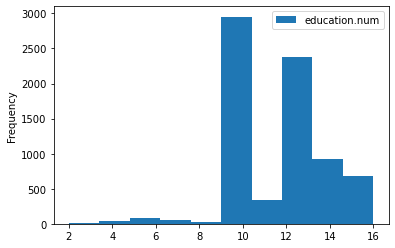

In [68]:
demographics.plot(kind='hist', y='education.num')

In [65]:
Ldems = lower_income[['age', 'education', 'education.num', 'marital.status', 'race', 'sex']]
Ldems

,age,education,education.num,marital.status,race,sex
1,82,HS-grad,9,Widowed,White,Female
3,54,7th-8th,4,Divorced,White,Female
4,41,Some-college,10,Separated,White,Female
5,34,HS-grad,9,Divorced,White,Female
6,38,10th,6,Separated,White,Male
...,...,...,...,...,...,...
32554,32,Masters,14,Never-married,Asian-Pac-Islander,Male
32556,22,Some-college,10,Never-married,White,Male
32557,27,Assoc-acdm,12,Married-civ-spouse,White,Female
32559,58,HS-grad,9,Widowed,White,Female


<AxesSubplot:ylabel='Frequency'>

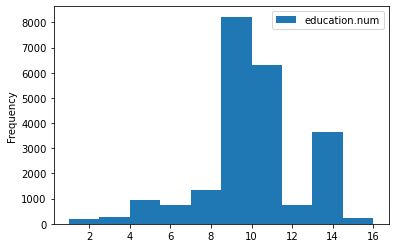

In [66]:
Ldems.plot(kind='hist', y='education.num')

In [42]:
lower_income= adult_df[adult_df['income'] == '<=50K']
lower_income

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


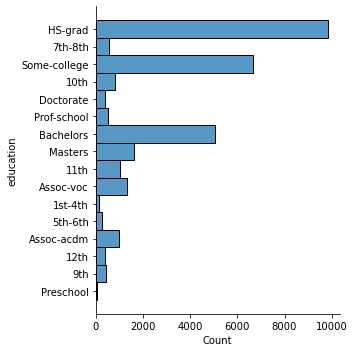

In [43]:
import seaborn as sns
sns.displot(adult_df, y="education")
#sns.displot(lower_income, y="education")

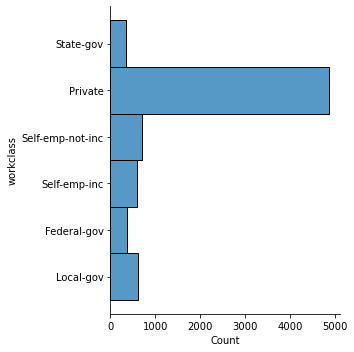

In [8]:
sns.displot(higher_income, y="workclass")

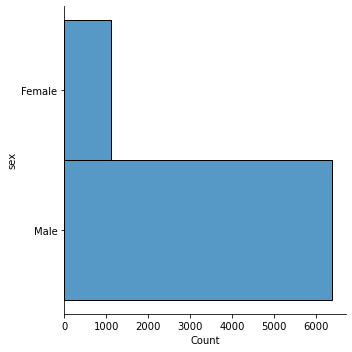

In [9]:
sns.displot(higher_income, y="sex")

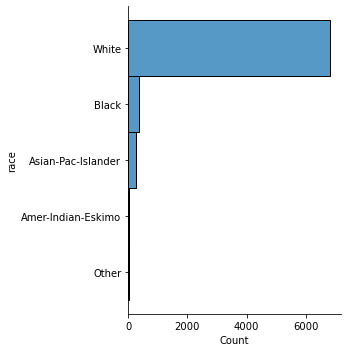

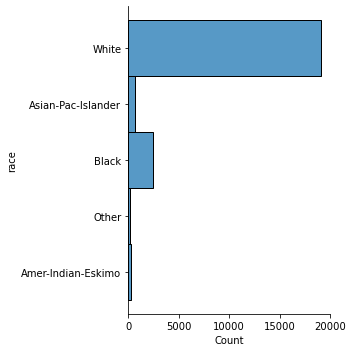

In [11]:
sns.displot(higher_income, y="race")
sns.displot(lower_income, y="race")

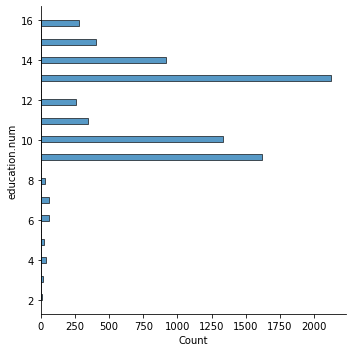

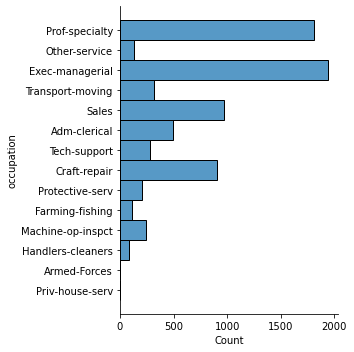

In [12]:
sns.displot(higher_income, y="education.num")
sns.displot(higher_income, y="occupation")


In [13]:
lower_income= adult_df[adult_df['income'] == '<=50K']
lower_income

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


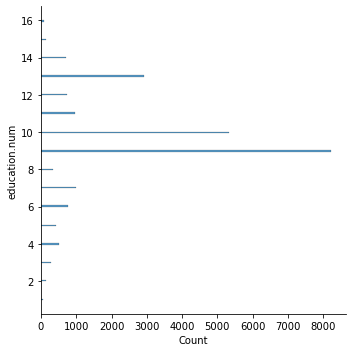

In [14]:
sns.displot(lower_income, y="education.num")

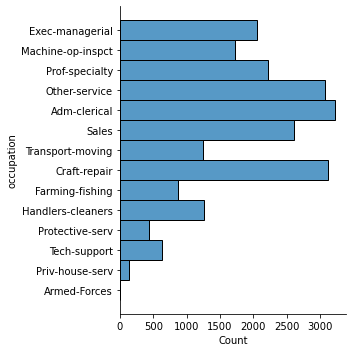

In [15]:
sns.displot(lower_income, y="occupation")

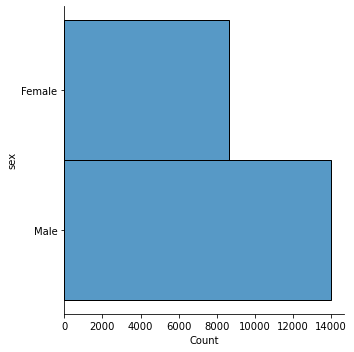

In [16]:
sns.displot(lower_income, y="sex")

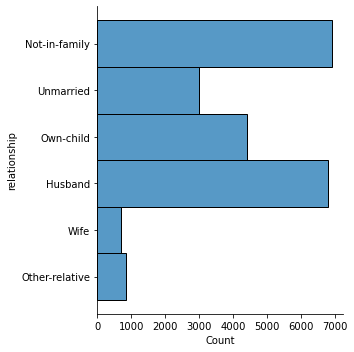

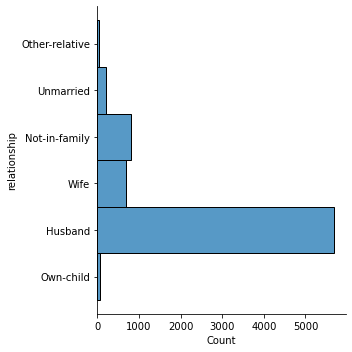

In [17]:
sns.displot(lower_income, y="relationship")
sns.displot(higher_income, y="relationship")

In [18]:
#this is a ML problem, make an predictive model
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
# Split the features and target data
y = adult_df['income']
X = adult_df.drop(columns='income')

In [20]:
# Encode the features dataset's categorical variables using get_dummies
X = pd.get_dummies(X)

# Review the features DataFrame
X.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,132870,9,0,4356,18,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,216864,9,0,3770,45,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,38,150601,6,0,3770,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
# Review the distinct values from y
y_train.value_counts()

<=50K    17011
>50K      5610
Name: income, dtype: int64

In [23]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [24]:
# Import the RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier instance
model = RandomForestClassifier()

# Fit the traning data to the model
model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [25]:
# Predict labels for original scaled testing features
y_pred = model.predict(X_test_scaled)

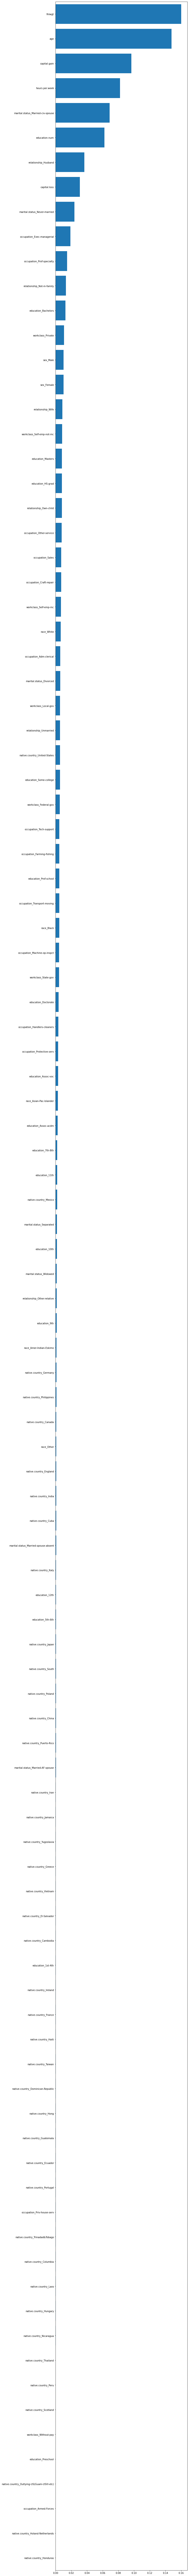

In [26]:
# Save the feature importances from the Random Forests classifier model to a variable named 
feature_importances = model.feature_importances_


# Use the following code to plot the most important features
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [27]:
# Import RandomUnderSampler from imblearn
from imblearn.under_sampling import RandomUnderSampler

# Instantiate a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=42)

In [28]:
# Fit the training data to the random undersampler model
X_undersampled, y_undersampled = rus.fit_resample(X_train_scaled, y_train)

In [29]:
# Count distinct values for the resampled target data
y_undersampled.value_counts()

<=50K    5610
>50K     5610
Name: income, dtype: int64

In [30]:
# Instantiate a new RandomForestClassier model
model_undersampled = RandomForestClassifier()

# Fit the undersampled data the new model
model_undersampled.fit(X_undersampled, y_undersampled)

RandomForestClassifier()

In [31]:
# Predict labels for oversampled testing features
y_pred_undersampled = model_undersampled.predict(X_test_scaled)

In [33]:
# Print classification reports
from sklearn.metrics import classification_report
print(f"Classifiction Report - Original Data")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classifiction Report - Undersampled Data")
print(classification_report(y_test, y_pred_undersampled))

Classifiction Report - Original Data
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      5643
        >50K       0.73      0.64      0.68      1898

    accuracy                           0.85      7541
   macro avg       0.81      0.78      0.79      7541
weighted avg       0.84      0.85      0.84      7541

---------
Classifiction Report - Undersampled Data
              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      5643
        >50K       0.59      0.83      0.69      1898

    accuracy                           0.81      7541
   macro avg       0.76      0.82      0.78      7541
weighted avg       0.85      0.81      0.82      7541



In [35]:
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler

# Instantiate a RandomOversampler instance
ros = RandomOverSampler(random_state=42)

In [36]:
# Fit the model to the training data
X_oversampled, y_oversampled = ros.fit_resample(X_train_scaled, y_train)

In [37]:
# Count distinct values
y_oversampled.value_counts()

<=50K    17011
>50K     17011
Name: income, dtype: int64

In [38]:
# Instantiate a new RandomForestClassier model
model_oversampled = RandomForestClassifier()

# Fit the oversampled data the new model
model_oversampled.fit(X_oversampled, y_oversampled)

RandomForestClassifier()

In [39]:
# Predict labels for oversampled testing features
y_pred_oversampled = model_oversampled.predict(X_test_scaled)

In [40]:
# Print classification reports
print(f"Classifiction Report - Original Data")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classifiction Report - Undersampled Data")
print(classification_report(y_test, y_pred_undersampled))
print("---------")
print(f"Classifiction Report - Oversampled Data")
print(classification_report(y_test, y_pred_oversampled))

Classifiction Report - Original Data
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      5643
        >50K       0.73      0.64      0.68      1898

    accuracy                           0.85      7541
   macro avg       0.81      0.78      0.79      7541
weighted avg       0.84      0.85      0.84      7541

---------
Classifiction Report - Undersampled Data
              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      5643
        >50K       0.59      0.83      0.69      1898

    accuracy                           0.81      7541
   macro avg       0.76      0.82      0.78      7541
weighted avg       0.85      0.81      0.82      7541

---------
Classifiction Report - Oversampled Data
              precision    recall  f1-score   support

       <=50K       0.90      0.89      0.89      5643
        >50K       0.68      0.69      0.69      1898

    accuracy                           0.84 